<a href="https://colab.research.google.com/github/eojo91/ds2_2023_summer_ml_project1/blob/eunok.jo/DataMining_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터과학 HW

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform, norm, binom, chi2
from scipy.stats import t
from sklearn.model_selection import train_test_split
from collections import Counter

####1.기댓값 계산

####2.조건부 확률 계산

#### 3.임의 표본 추정

각각의 분포에서 표본을 1000개 생성하고, 이 데이터를 이용하여 왜도(skewness), 첨도(kurtosis)를 추정하시오.

표본 평균 $\bar{x} = {1\over{n}}\sum_{i=1}^n x_i$

표본 분산 $s^2 = {1\over{n-1}}\sum_{i=1}^n (x_i - \bar{x})^2$

표본 왜도 = ${1\over{n-1}}\sum_{i=1}^n({{x_i-\bar{x}}\over{s}})^3$

표본 첨도 = ${1\over{n-1}}\sum_{i=1}^n({{x_i-\bar{x}}\over{s}})^4$

---


#####(a) 왜도(Skewness)

왜도(skewness): 분포가 한쪽으로 치우친 정도를 측정하는 통계량

i. **N(0,2)** 과 𝒳(**5**) 표본을 생성한 후, 분포를 그리시오.

ii. 각 분포에서 왜도를 구하시오.

N(0,2)의 왜도: -0.016287629958926988
chi(5)의 왜도: 1.3285760176978292


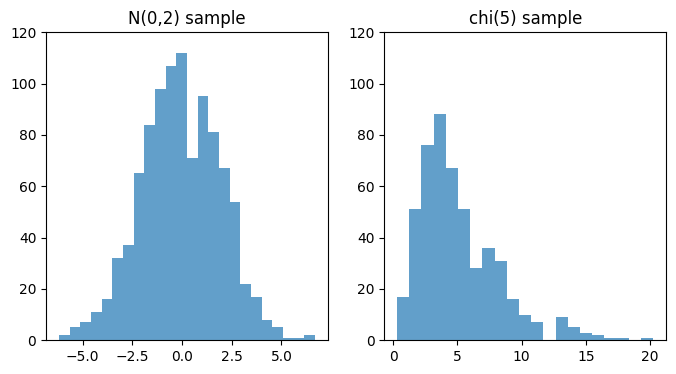

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, chi2
from scipy.stats import skew


normal_sample = norm.rvs(loc = 0, scale= 2, size=1000)
chi_sample = chi2.rvs(5, size=500)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.hist(x=normal_sample, bins='auto', alpha=0.7)
ax1.set_title('N(0,2) sample')
ax1.set_ylim([0,120])

ax2.hist(x=chi_sample, bins='auto', alpha=0.7)
ax2.set_title('chi(5) sample')
ax2.set_ylim([0,120])
fig.show()

print(f'N(0,2)의 왜도: {skew(normal_sample)}')
print(f'chi(5)의 왜도: {skew(chi_sample)}')

#####(b) 첨도

첨도(Kurtosis): 이상치가 얼마나 존재하는지를 측정하는 통계량

i. 자유도가 1인 t분포, 자유도가 10인 t분포와 표준정규분포(N(0,1))에서 표본을 생성한 후, 분포를 그리시오.

ii. 각 분포에서 첨도를 구하시오.

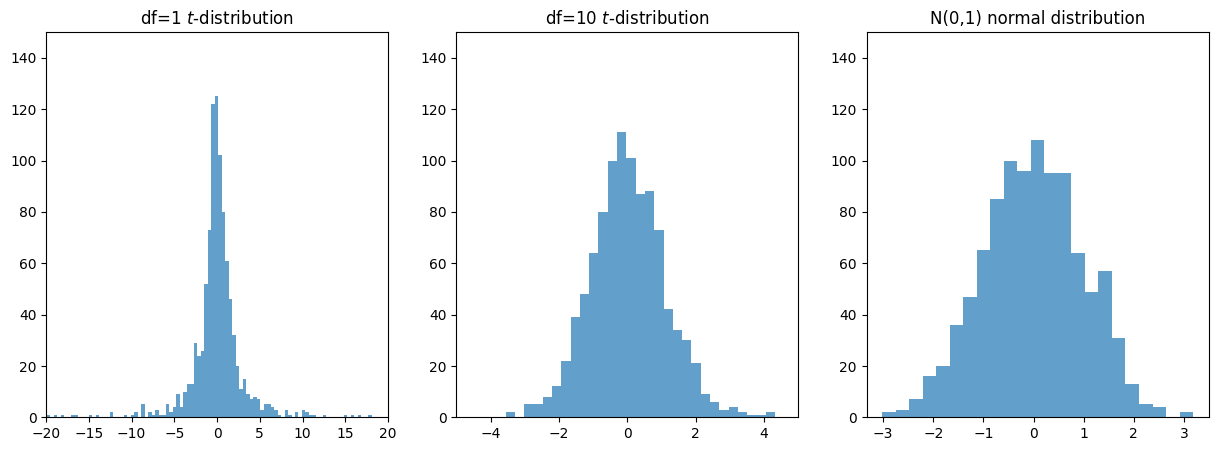

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import kurtosis
from scipy.stats import t, norm

t_sample_1 = t.rvs(df=1, size=1000)
t_sample_10 = t.rvs(df=10, size=1000)
snormal_sample = norm.rvs(loc=0, scale=1, size=1000) # 정규분포

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_xlim(-20, 20)
ax1.set_ylim(0, 150)
ax1.hist(t_sample_1, bins='auto', alpha=0.7)
ax1.set_title(r'df=1 $t$-distribution')

ax2.set_xlim(-5, 5)
ax2.set_ylim(0, 150)
ax2.hist(t_sample_10, bins='auto', alpha=0.7)
ax2.set_title(r'df=10 $t$-distribution')

ax3.set_ylim(0, 150)
ax3.hist(snormal_sample, bins='auto', alpha=0.7)
ax3.set_title(r'N(0,1) normal distribution')

fig.show()

print(r'df=1 t-distribution kurtosis:', kurtosis(t_sample_1))
print(r'df=10 t-distribution kurtosis:', kurtosis(t_sample_10))
print(r'N(0,1) normal distribution kurtosis:', kurtosis(snormal_sample))

#### 4.랜덤워크

$X_i \overset{i.i.d}{\sim} U(-1, 1)$ 일 때, $S_n = X_1 + \cdots + X_n$ 인 랜덤워크에 대해서 고려하자.

독립적으로 생성된 두 개의 랜덤워크 $\{S_n : n = 1, \cdots , 10000\}$ 과 $\{S_n' : n = 1, \cdots , 10000\}$ 의 상관계수를 구하시오.

In [ ]:
import numpy as np
from scipy.stats import uniform


uniform_sample1 = uniform.rvs(loc = -1, scale = 2, size = 10000)
uniform_sample2 = uniform.rvs(loc = -1, scale = 2, size = 10000)

random_walk1 = np.array([])
random_walk2 = np.array([])

for i in range(10000):
  random_walk1 = np.append(random_walk1, uniform_sample1[0:i+1].sum())
  random_walk2 = np.append(random_walk2, uniform_sample2[0:i+1].sum())

np.corrcoef(random_walk1, random_walk2)

array([[ 1.        , -0.70621898],
       [-0.70621898,  1.        ]])

#### 5.모비율 검정

로또는 45개의 숫자 중에서 6개의 당첨 번호를 추첨한다. 10번의 모의실험을 통해 당첨번호를 추출 한 후, 각 번호가 나올 확률이 동일한지를 검정하려고 한다. 다음의 절차를 따르시오.

(이 때 i번째 공이 당첨번호에 포함될 확률을 $p_i$라고 하자.)

---


(a) 각 번호가 나올 확률이 동일하다고 가정하고 로또 당첨 번호를 10회 추출하시오.

(b) 10개의 표본을 통해 각 i번째 공이 당첨 번호에 포함 될 확률 $\hat{p}_i$ 를 추정하시오.

(c) 각 i에 대해 다음의 검정을 시행하시오. p-value가 0.05보다 작은 경우는 몇 개 있는가?

> $H_0 : p_i = 6/45$ vs $H_1 : p_i > 6/45$

(d) 본페르니 교정을 이용하여, 다중 검정을 시행하시오. p-value가 0.05/45보다 작은 경우는 몇 개 있는가?

> $H_0 : p_i = 6/45, ∀i$ vs $H_1$ : 어떤 i에 대해서 $p_i > 6/45$ 을 만족한다.

#### 6.p-value 계산
스웨인 대 알리바마 재판에서 귀무 가설은 '공정한 배심원 선택' 이고 대립가설은 '불공정한 배심원 선택'이다. 전체 인구 중 26%가 흑인이다. 우리는 100명을 뽑았을 때, 8명의 흑인이 선택되었다는 데이터를 관찰하였다. 이 경우 p-value를 구하여라.

(hint: 이항분포의 누적분포함수 또는 확률질량함수를 이용하시오.)

In [ ]:
from scipy.stats import uniform

H1 = 0
for i in range(8):
  H1 += binom.pmf(k=i, n=100, p=0.26)
#print(binom.cdf(k=8, n = 100, p=0.26))

print(f'p-value: {H1}')

4.73479499788932e-06
유의 확률: 1.1138400559927344e-06


####7.분산이 같기 위한 필요조건

아빠의 키 $Y_i$, 자식의 키 $X_i$의 관계를 $Y_i = βX_i + ϵ_i$라고 하자. (단 $X_i$ 와 $ϵ_i$는 독립이다.)

$Y_i$의 분산과 $X_i$의 분산이 같기 위한 필요조건이 $|β| < 1$ 임을 보이시오.

####8.예측 구간 추정

다음의 데이터가 주어졌다고 하자. 이 때, 설명 변수를 $(x_1,x_2)$, 반응 변수를 $y$로 하는 선형회귀모형을 가정하고 $(x_1,x_2) = (0.1,0.2)$일 때, Bootstrap resampling을 통한 예측구간(prediction interval)을 추정하고자 한다.

다음의 식을 만족하는 $[L, U]$을 $x_{new}$일 때, 신뢰도가 $(1-α)%$인 예측 구간이라고 한다.



> $P(L \le x_{new}^T \hat{β} + ϵ ≤ U) = 1 - \alpha$



|#|1|2|3|4|5|6|7|8|9|10
|---|---|---|---|---|---|---|---|---|---|---|
|$y$|5.|7.9|11.2|11.7|8.9|6.8|8.4|8.8|10.1|7.5|
|$x_1$|1.|1.1|1.5|3.|2.4|1.2|2.4|2.9|1.3|2.|
|$x_2$|0.5|2.1|3.|1.5|1.7|1.2|0.2|0.9|2.3|1.|

#####(a) Bootstrap resampling을 이용하여 bootstrap sample을 얻고 이를 이용하여 선형회귀모형의 계수를 추정하시오.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

x1 = np.array([1.,1.1,1.5,3.,2.4,1.2,2.4,2.9,1.3,2.])
x2 = np.array([0.5,2.1,3.,1.5,1.7,1.2,0.2,0.9,2.3,1.])
y = np.array([5.,7.9,11.2,11.7,8.9,6.8,8.4,8.8,10.1,7.5])

In [2]:
def bootstrap_sampling():
  rand_idx = np.random.choice(10, 10, replace=True)
  boots_x = np.array([x1[rand_idx], x2[rand_idx]]).T
  boots_y = y[rand_idx]

  boots_x = sm.add_constant(boots_x, has_constant = 'add')
  model = sm.OLS(boots_y, boots_x)

  return model.fit()

In [7]:
result = bootstrap_sampling()
print(result.params)

[1.57005894 2.58403318 1.86679998]


#####(b) 위에서 추정한 모형을 이용하여 $(x_1, x_2) = (0.1, 0.2)$

In [13]:
pred = result.predict([1, 0.1, 0.2])
print(pred)

#####(c) 위에서 추정한 모형과 bootstrap sample들을 이용하여 잔차들을 구하고, 그 잔차들 중 하나의 값을 랜덤 추출하시오.

In [12]:
res = np.random.choice(result.resid, 1)
print(res)

[0.25490143]


#####(d) (b)에서 추정한 예측값과 (c)에서 생성된 노이즈를 더한 값을 저장하시오.

In [14]:
print(pred + res)

[2.45672369]


#####(e) (a) - (d) 의 과정을 2000번 반복하시오.


In [20]:
def iter2000():
  X = []
  for _ in range(2000):
    result = bootstrap_sampling()
    pred = result.predict([1, 0.1, 0.2])
    res = np.random.choice(result.resid, 1)
    X.append((pred+res)[0])
  return X


X = iter2000()

[2.2140426707644294, 2.4864872323112404, 2.300720922313567, 0.8112282078958548, 2.9705217756616906, 2.2092389147906975, 3.581722455589157, 2.6807352581645, 2.2556163074369318, 2.728623756591016, 1.4780727687588926, 1.8582465291909553, 2.8937875158138326, 2.4376603106987904, 2.9267017705052556, 2.819279517986681, 1.2989838938111427, 0.7497608697508884, 2.9097787110080526, 2.257067949813372, 4.342789508297214, 2.2766079915507826, 3.752059282502451, 4.306936065260135, 3.648723887222948, 3.445386629892967, 4.171817768171989, 1.925188725769126, 5.365238748000901, 2.7053931200466392, 2.6157195570446676, 3.076556122448979, 3.548945139738397, 3.277801949941789, 1.8396547983035823, 1.1575876972084895, 5.049545296919337, 2.3158124669037, 3.9718906860011183, 2.9646970523303184, 4.67087089373045, 2.5228132992327357, 2.1822293687411416, 1.075790646199032, 2.5028294345271185, 2.955393037619312, 2.9636526087608672, 3.7867499944105902, 2.791699470122814, 4.394969745340486, 3.5907603232454792, 5.098425

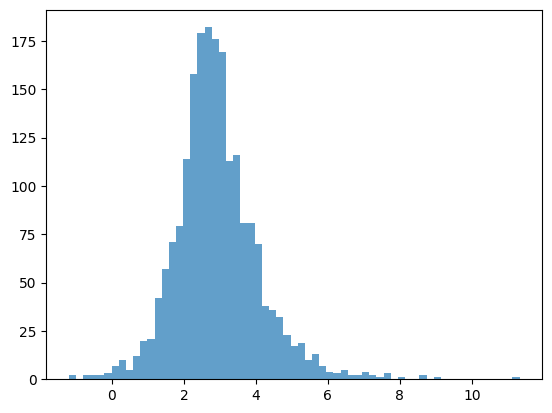

In [22]:
import matplotlib.pyplot as plt

plt.hist(X, bins='auto', alpha=0.7)
plt.show()

####9.QQ-plot

|#|1|2|3|4|5|6|7|8|9|10
|---|---|---|---|---|---|---|---|---|---|---|
|$y$|5.|7.9|11.2|11.7|8.9|6.8|8.4|8.8|10.1|7.5|
|$x_1$|1.|1.1|1.5|3.|2.4|1.2|2.4|2.9|1.3|2.|
|$x_2$|0.5|2.1|3.|1.5|1.7|1.2|0.2|0.9|2.3|1.|

####10.차원의 저주

####11.상관관계와 인과관계
상관관계이지만 인과관계가 아닌 예를 쓰시오.

####12.모집단의 표본 추출

####13.모형의 편이 비교

####14.지도학습의 예를 드시오.

####15.층화추출법을 사용하는 예를 드시오.

####16.사후추출법을 사용하는 예를 드시오.

####17.